In [1]:
%matplotlib inline


# Linear Regression Example

This example uses the only the first feature of the `diabetes` dataset, in
order to illustrate a two-dimensional plot of this regression technique. The
straight line can be seen in the plot, showing how linear regression attempts
to draw a straight line that will best minimize the residual sum of squares
between the observed responses in the dataset, and the responses predicted by
the linear approximation.

The coefficients, the residual sum of squares and the variance score are also
calculated.




Automatically created module for IPython interactive environment
Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Variance score: 0.47


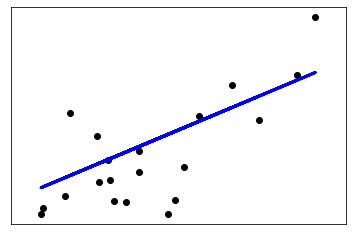

In [2]:
print(__doc__)


# Code source: Jaques Grobler
# License: BSD 3 clause


import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print("Mean squared error: %.2f"
      % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test,  color='black')
plt.plot(diabetes_X_test, diabetes_y_pred, color='blue', linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

In [3]:
regr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [4]:
regr.coef_

array([938.23786125])

In [5]:
regr.intercept_

152.91886182616167

In [6]:
import numpy as np
import scipy as sp
from scipy.optimize import leastsq
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
def real_func(x):
    return np.sin(2*np.pi*x)

In [8]:
def fit_func(p, x):
    f = np.poly1d(p)
    return f(x)

In [9]:
def residuals_func(p, x, y):
    ret = fit_func(p, x) - y
    return ret

In [10]:
x = np.linspace(0, 1, 10)
x_points = np.linspace(0, 1, 1000)

In [11]:
x

array([0.        , 0.11111111, 0.22222222, 0.33333333, 0.44444444,
       0.55555556, 0.66666667, 0.77777778, 0.88888889, 1.        ])

In [12]:
len(x_points)

1000

In [13]:
y_ = real_func(x)

In [14]:
y_

array([ 0.00000000e+00,  6.42787610e-01,  9.84807753e-01,  8.66025404e-01,
        3.42020143e-01, -3.42020143e-01, -8.66025404e-01, -9.84807753e-01,
       -6.42787610e-01, -2.44929360e-16])

In [15]:
y = [np.random.normal(0, 0.1)+y1 for y1 in y_]

In [16]:
y

[0.1023860606508045,
 0.6280685053889454,
 1.0118315409211267,
 0.8161361765812767,
 0.4691757304995232,
 -0.43529348234403187,
 -0.9666761399986336,
 -0.9822627888768791,
 -0.7682547375519918,
 -0.15512124933228671]

In [17]:
def fitting(M=0):
    """
    M is the order of polynomial
    """    
    # initialization
    p_init = np.random.rand(M+1)
    # least square
    p_lsq = leastsq(residuals_func, p_init, args=(x, y))
    print('Fitting Parameters:', p_lsq[0])

    # to visualize
    plt.plot(x_points, real_func(x_points), label='real')
    plt.plot(x_points, fit_func(p_lsq[0], x_points), label='fitted curve')
    plt.plot(x, y, 'bo', label='noise')
    plt.legend()
    return p_lsq

Fitting Parameters: [-0.02800098]


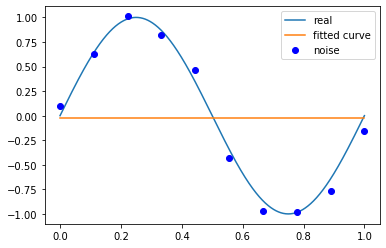

In [18]:
p_lsq_0 = fitting(M=0)

Fitting Parameters: [-1.54446581  0.74423186]


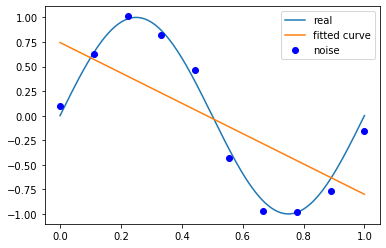

In [19]:
p_lsq_1 = fitting(M=1)

Fitting Parameters: [ 2.04832760e+01 -3.08201079e+01  1.02084938e+01  2.20651915e-02]


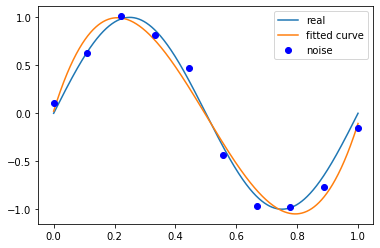

In [20]:
p_lsq_3 = fitting(M=3)

Fitting Parameters: [-2.52866178e+04  1.17104449e+05 -2.27848498e+05  2.41719888e+05
 -1.51770121e+05  5.72566145e+04 -1.25423413e+04  1.42412976e+03
 -5.77596310e+01  1.02386061e-01]


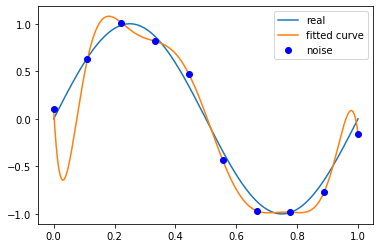

In [21]:
p_lsq_9 = fitting(M=9)

In [22]:
regularization = 0.0001

def residuals_func_regularization(p, x, y):
    ret = fit_func(p, x) - y
    ret = np.append(ret, np.sqrt(0.5*regularization*np.square(p))) # L2 regularization
    return ret

In [23]:
p_init = np.random.rand(9+1)
p_lsq_regularization = leastsq(residuals_func_regularization, p_init, args=(x, y))

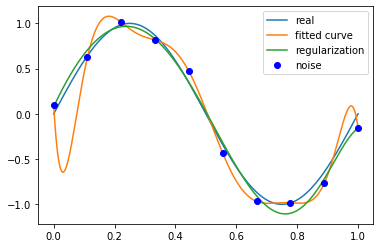

In [24]:
plt.plot(x_points, real_func(x_points), label='real')
plt.plot(x_points, fit_func(p_lsq_9[0], x_points), label='fitted curve')
plt.plot(x_points, fit_func(p_lsq_regularization[0], x_points), label='regularization')
plt.plot(x, y, 'bo', label='noise')
plt.legend()